In [ ]:
from google.colab import files
uploaded = files.upload()

Saving elephants.zip to elephants.zip


In [ ]:
import zipfile
import os

# Replace 'your_file.zip' with the name of your uploaded file
with zipfile.ZipFile('elephants.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving elephants.yaml to elephants.yaml


In [ ]:
import yaml

# Load the uploaded YAML file
with open('elephants.yaml', 'r') as file:
    data = yaml.safe_load(file)

# Update the paths
data['train'] = '/content/elephants/train/images'
data['val'] = '/content/elephants/valid/images'
data['test'] = '/content/elephants/test/images'

# Save the modified YAML file
with open('elephants_updated.yaml', 'w') as file:
    yaml.dump(data, file)

In [ ]:
pip install ultralytics --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.8/978.8 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.7 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 67.9MB/s]


In [ ]:
model.train(
    data="/content/elephants_updated.yaml",  # path to your data.yaml
    epochs=50,                # number of training epochs
    batch=16,                 # batch size (adjust based on your GPU memory)
    lr0=0.001,                # initial learning rate (lower for fine-tuning)
    freeze=10,                # freeze first 10 layers to retain base features
    imgsz=640,                # image size (default is 640, you can increase for better precision)
    workers=4,                # number of CPU workers for data loading
    optimizer='SGD'           # or 'Adam' (Adam might converge faster on small data)
)

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/elephants_updated.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=10, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_widt

100%|██████████| 755k/755k [00:00<00:00, 14.5MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /content/elephants/train/labels... 1153 images, 4 backgrounds, 0 corrupt: 100%|██████████| 1153/1153 [00:01<00:00, 785.87it/s]

train: New cache created: /content/elephants/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 25.0±16.6 MB/s, size: 98.7 KB)


val: Scanning /content/elephants/valid/labels... 341 images, 8 backgrounds, 0 corrupt: 100%|██████████| 341/341 [00:00<00:00, 523.71it/s]

val: New cache created: /content/elephants/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: SGD(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.61G      1.476      2.725      1.672          3        640: 100%|██████████| 73/73 [00:28<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.99it/s]

                   all        341        976      0.585        0.4      0.397      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.35G      1.449      1.441       1.59          1        640: 100%|██████████| 73/73 [00:25<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.28it/s]


                   all        341        976      0.671      0.451      0.479      0.186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.55G      1.352       1.25      1.478          3        640: 100%|██████████| 73/73 [00:24<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.34it/s]


                   all        341        976      0.629      0.536      0.556      0.212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.55G      1.355       1.17      1.466          3        640: 100%|██████████| 73/73 [00:24<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.10it/s]


                   all        341        976      0.655      0.472      0.494      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.56G      1.296      1.073      1.443          2        640: 100%|██████████| 73/73 [00:25<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.62it/s]

                   all        341        976      0.724      0.496      0.568       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.86G      1.333       1.11       1.44          3        640: 100%|██████████| 73/73 [00:23<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.58it/s]


                   all        341        976      0.737      0.479       0.54      0.198

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.87G      1.331      1.077      1.425          4        640: 100%|██████████| 73/73 [00:24<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.13it/s]


                   all        341        976      0.722      0.523      0.603      0.226

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.88G      1.282      1.017      1.399          3        640: 100%|██████████| 73/73 [00:24<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.39it/s]


                   all        341        976      0.718      0.484      0.553      0.208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.89G       1.27     0.9644      1.364          4        640: 100%|██████████| 73/73 [00:24<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.39it/s]


                   all        341        976      0.671      0.543      0.578      0.217

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.89G      1.289      1.126      1.406          1        640: 100%|██████████| 73/73 [00:24<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.19it/s]

                   all        341        976      0.739      0.496      0.555      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       2.9G      1.228     0.9899      1.369          1        640: 100%|██████████| 73/73 [00:24<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.42it/s]


                   all        341        976      0.693      0.544      0.582      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.23G      1.232      0.966      1.362          2        640: 100%|██████████| 73/73 [00:24<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.84it/s]


                   all        341        976      0.689      0.596      0.634      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.24G      1.272       1.04      1.403         47        640: 100%|██████████| 73/73 [00:25<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.37it/s]


                   all        341        976      0.747      0.591      0.653      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.24G      1.247     0.9761      1.353          1        640: 100%|██████████| 73/73 [00:24<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.31it/s]


                   all        341        976      0.716      0.559      0.625      0.251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.26G       1.19     0.9448       1.34          2        640: 100%|██████████| 73/73 [00:24<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.94it/s]

                   all        341        976      0.744      0.577      0.643      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.26G      1.217       0.94      1.342          4        640: 100%|██████████| 73/73 [00:23<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.53it/s]

                   all        341        976      0.754      0.574      0.656      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.27G      1.225     0.9879      1.367          5        640: 100%|██████████| 73/73 [00:24<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.77it/s]

                   all        341        976      0.693      0.578      0.609      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.28G      1.221     0.9624      1.354          2        640: 100%|██████████| 73/73 [00:24<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.23it/s]

                   all        341        976      0.697      0.557      0.597      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.29G      1.153     0.8927      1.303          2        640: 100%|██████████| 73/73 [00:24<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.17it/s]


                   all        341        976      0.733        0.6      0.639      0.255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       3.3G      1.212     0.9411      1.338          6        640: 100%|██████████| 73/73 [00:25<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.62it/s]

                   all        341        976      0.705      0.631      0.638      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.63G      1.256     0.9895      1.379          1        640: 100%|██████████| 73/73 [00:24<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.53it/s]


                   all        341        976      0.746      0.599      0.641      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.64G      1.173     0.9058      1.311          6        640: 100%|██████████| 73/73 [00:24<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.44it/s]

                   all        341        976      0.745      0.595      0.654      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.65G      1.193     0.9546      1.341          3        640: 100%|██████████| 73/73 [00:24<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.44it/s]


                   all        341        976      0.716      0.633      0.651       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.66G      1.208     0.9333      1.364          1        640: 100%|██████████| 73/73 [00:24<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.46it/s]


                   all        341        976      0.777      0.643      0.682      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.67G      1.153      0.896      1.303          5        640: 100%|██████████| 73/73 [00:24<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.15it/s]


                   all        341        976      0.736      0.614       0.65      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.67G      1.124     0.8665      1.292          3        640: 100%|██████████| 73/73 [00:24<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.36it/s]

                   all        341        976       0.75      0.633      0.666      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.68G      1.177     0.9313      1.313          5        640: 100%|██████████| 73/73 [00:23<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.46it/s]

                   all        341        976      0.746      0.586      0.641      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.69G      1.135     0.8859      1.297          7        640: 100%|██████████| 73/73 [00:25<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.98it/s]


                   all        341        976      0.695      0.622      0.637       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       3.7G       1.11     0.8658       1.27          3        640: 100%|██████████| 73/73 [00:24<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.27it/s]

                   all        341        976      0.743      0.638      0.674      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       3.7G      1.123      0.904       1.31          1        640: 100%|██████████| 73/73 [00:24<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.26it/s]


                   all        341        976      0.779      0.577      0.652      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.71G      1.132     0.8459      1.285          4        640: 100%|██████████| 73/73 [00:24<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.99it/s]


                   all        341        976       0.75      0.635       0.69      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.72G      1.127     0.9061      1.307          3        640: 100%|██████████| 73/73 [00:23<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.60it/s]

                   all        341        976      0.771      0.624      0.684      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.73G      1.139     0.9249      1.311          3        640: 100%|██████████| 73/73 [00:23<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.60it/s]


                   all        341        976      0.752      0.615      0.664      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.73G      1.134     0.8784      1.297         15        640: 100%|██████████| 73/73 [00:23<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.02it/s]


                   all        341        976      0.718      0.621      0.651      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.75G      1.127     0.8724      1.285          3        640: 100%|██████████| 73/73 [00:24<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.08it/s]


                   all        341        976      0.749      0.596      0.656      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.75G      1.107     0.8614      1.276          3        640: 100%|██████████| 73/73 [00:25<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.21it/s]


                   all        341        976      0.768      0.609      0.675       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.76G       1.08     0.8568       1.26          4        640: 100%|██████████| 73/73 [00:24<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.23it/s]


                   all        341        976      0.742      0.642      0.667      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.76G      1.118      0.849      1.278          3        640: 100%|██████████| 73/73 [00:23<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.15it/s]


                   all        341        976      0.723      0.661      0.678      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.78G      1.106     0.8505      1.283          3        640: 100%|██████████| 73/73 [00:24<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.43it/s]


                   all        341        976      0.775      0.653      0.689      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.79G       1.07       0.82       1.27          4        640: 100%|██████████| 73/73 [00:24<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.98it/s]

                   all        341        976      0.751      0.635      0.677      0.286


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.79G      1.116     0.8496      1.284          1        640: 100%|██████████| 73/73 [00:25<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.40it/s]


                   all        341        976      0.769      0.627      0.668      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.79G      1.143      0.888      1.311          3        640: 100%|██████████| 73/73 [00:23<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.25it/s]


                   all        341        976       0.77      0.629      0.674      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.81G      1.091     0.8393       1.27          2        640: 100%|██████████| 73/73 [00:23<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.10it/s]


                   all        341        976      0.726      0.642      0.652      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.82G      1.061     0.8127      1.266          1        640: 100%|██████████| 73/73 [00:24<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.19it/s]


                   all        341        976      0.715      0.656       0.66      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.82G      1.078     0.8197       1.26          1        640: 100%|██████████| 73/73 [00:23<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.79it/s]

                   all        341        976      0.733       0.66      0.671      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.83G      1.101     0.8336       1.27          1        640: 100%|██████████| 73/73 [00:22<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.54it/s]

                   all        341        976      0.732      0.637       0.66      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.84G      1.054     0.7904       1.25          1        640: 100%|██████████| 73/73 [00:22<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.46it/s]


                   all        341        976      0.729      0.648      0.673      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.85G      1.072     0.8049      1.255          1        640: 100%|██████████| 73/73 [00:22<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.41it/s]

                   all        341        976      0.736      0.644      0.664      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.86G      1.063     0.7884      1.248          1        640: 100%|██████████| 73/73 [00:22<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.84it/s]


                   all        341        976      0.734      0.647      0.664      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.86G      1.058      0.793      1.246          1        640: 100%|██████████| 73/73 [00:23<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.16it/s]


                   all        341        976      0.742      0.655       0.67      0.289

50 epochs completed in 0.396 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.17it/s]


                   all        341        976      0.771      0.654      0.688      0.294
              elephant        333        976      0.771      0.654      0.688      0.294
Speed: 0.3ms preprocess, 2.5ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([20])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f9320f57bd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048,

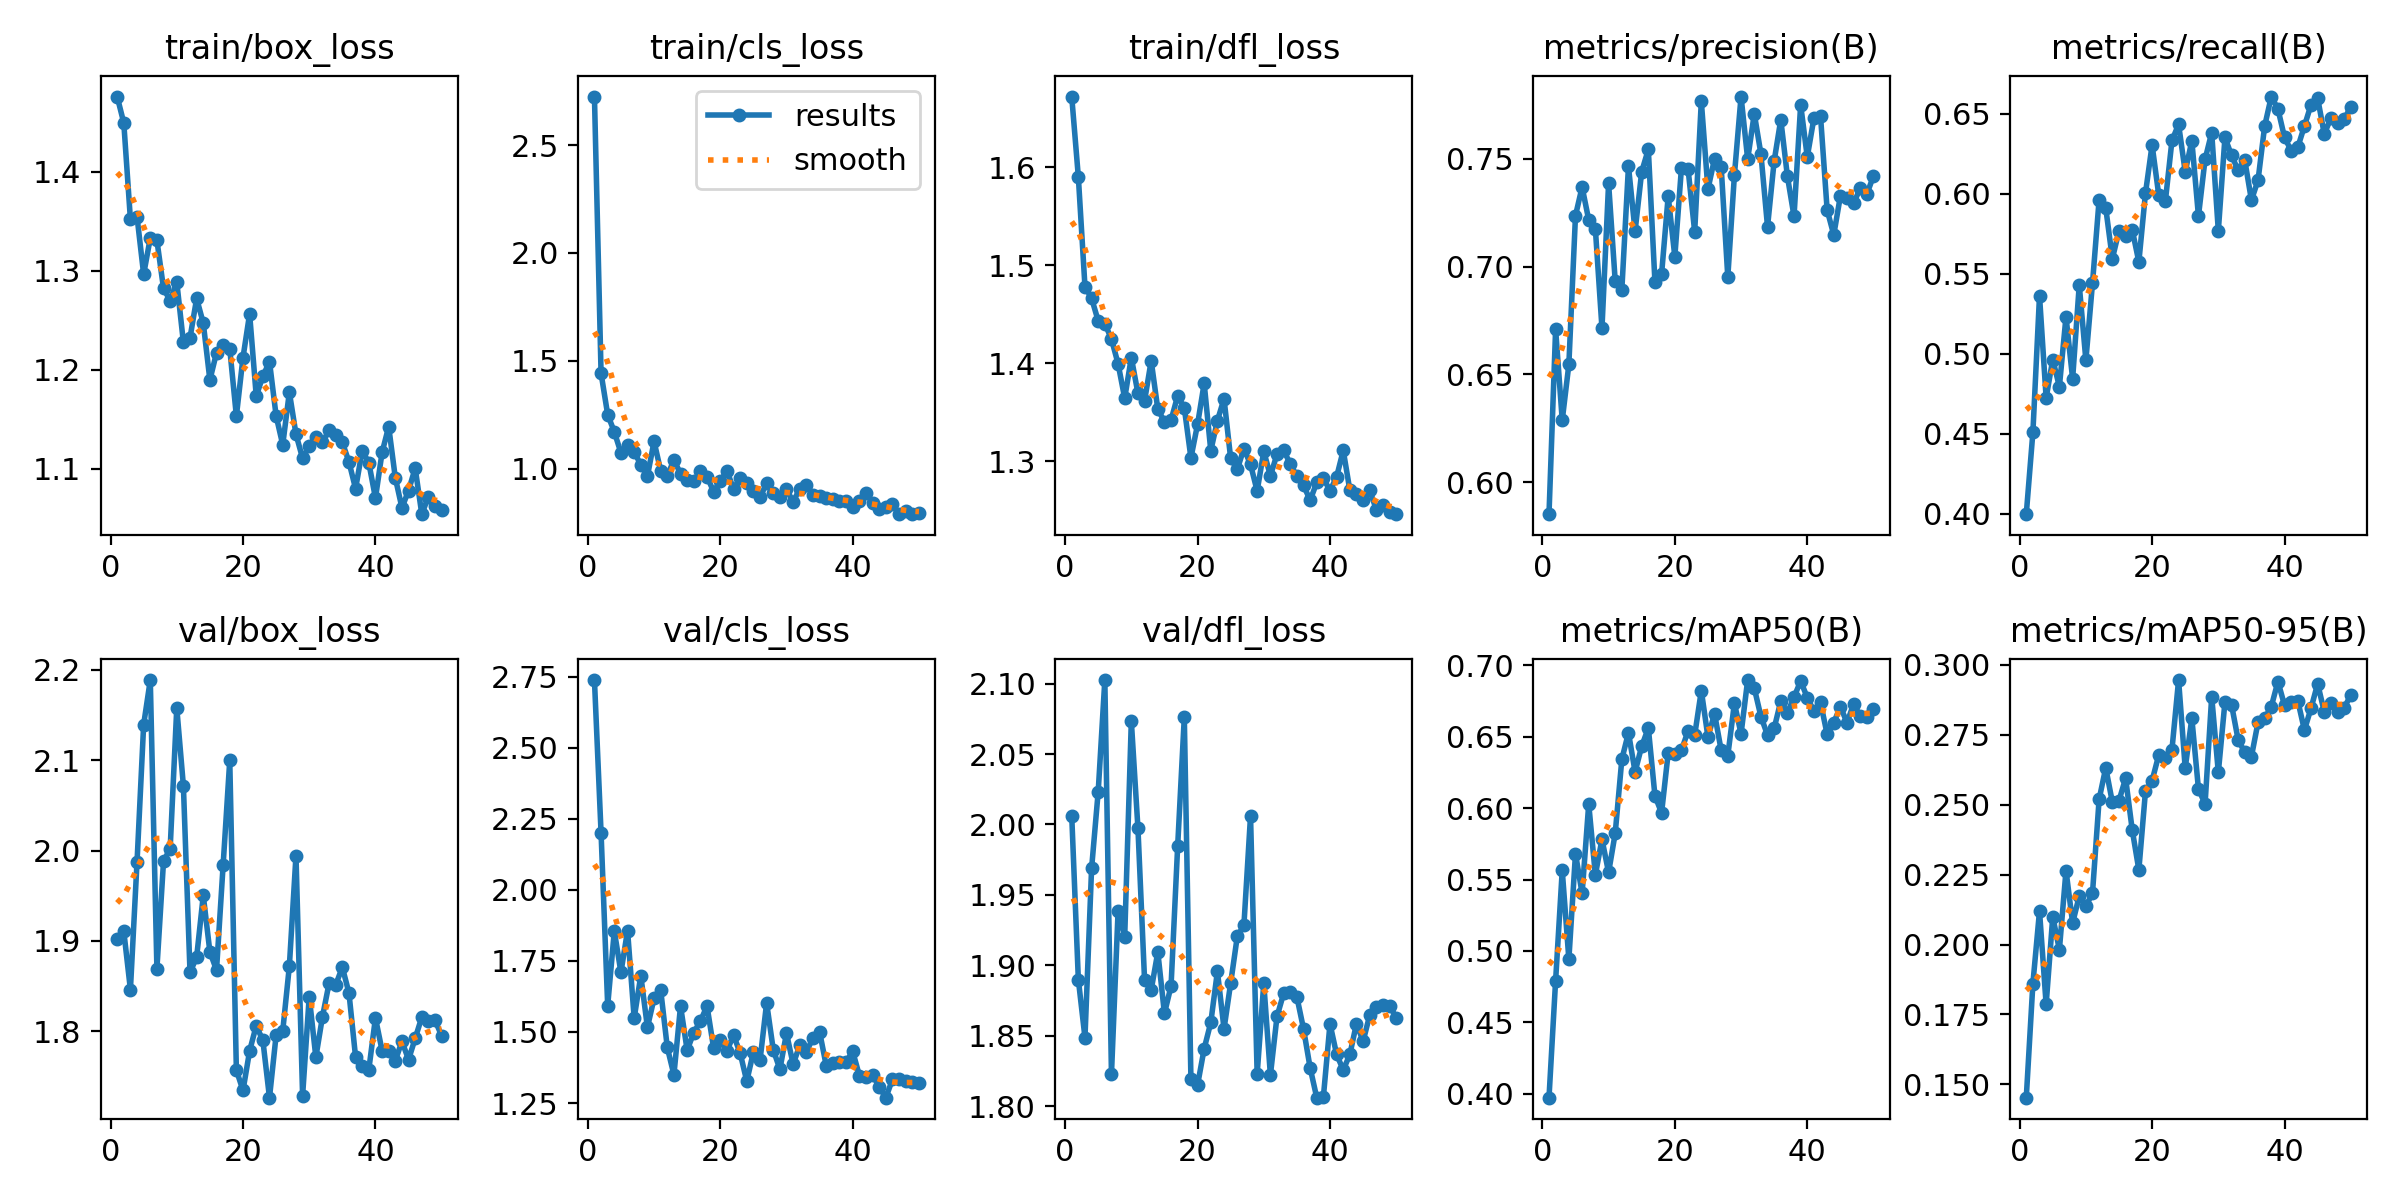

In [ ]:
from IPython.display import Image, display
display(Image(filename='runs/detect/train/results.png'))


In [ ]:
from ultralytics import YOLO

# Load your fine-tuned model
model = YOLO('runs/detect/train/weights/best.pt')

# Export to multiple formats
model.export(format='onnx')       # ONNX format
model.export(format='torchscript') # TorchScript
model.export(format='openvino')   # OpenVINO IR format


Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.30GHz)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (5.3 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 276.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 313.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.8/280.8 MB 211.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 195.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 263.3 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 14.8s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for upd

'runs/detect/train/weights/best_openvino_model'

In [ ]:
!zip -r /content/train_folder.zip /content/runs/detect/train/

  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/P_curve.png (deflated 16%)
  adding: content/runs/detect/train/results.csv (deflated 60%)
  adding: content/runs/detect/train/labels_correlogram.jpg (deflated 34%)
  adding: content/runs/detect/train/PR_curve.png (deflated 18%)
  adding: content/runs/detect/train/val_batch2_labels.jpg (deflated 8%)
  adding: content/runs/detect/train/labels.jpg (deflated 30%)
  adding: content/runs/detect/train/F1_curve.png (deflated 17%)
  adding: content/runs/detect/train/confusion_matrix.png (deflated 17%)
  adding: content/runs/detect/train/weights/ (stored 0%)
  adding: content/runs/detect/train/weights/best.onnx (deflated 13%)
  adding: content/runs/detect/train/weights/best.pt (deflated 10%)
  adding: content/runs/detect/train/weights/best_openvino_model/ (stored 0%)
  adding: content/runs/detect/train/weights/best_openvino_model/best.xml (deflated 94%)
  adding: content/runs/detect/train/weights/best_openvino_m

In [ ]:
from google.colab import files
files.download('/content/train_folder.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from ultralytics import YOLO
from google.colab import files
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import torch
import numpy as np


In [ ]:
uploaded = files.upload()

# Get the filename
img_path = list(uploaded.keys())[0]
print(f"Uploaded image: {img_path}")


Saving thermal16_001.jpg to thermal16_001.jpg
Uploaded image: thermal16_001.jpg


In [ ]:
model = YOLO('/content/runs/detect/train/weights/best.pt')

In [ ]:
results = model(img_path)


image 1/1 /content/thermal16_001.jpg: 640x640 2 elephants, 18.2ms
Speed: 3.4ms preprocess, 18.2ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


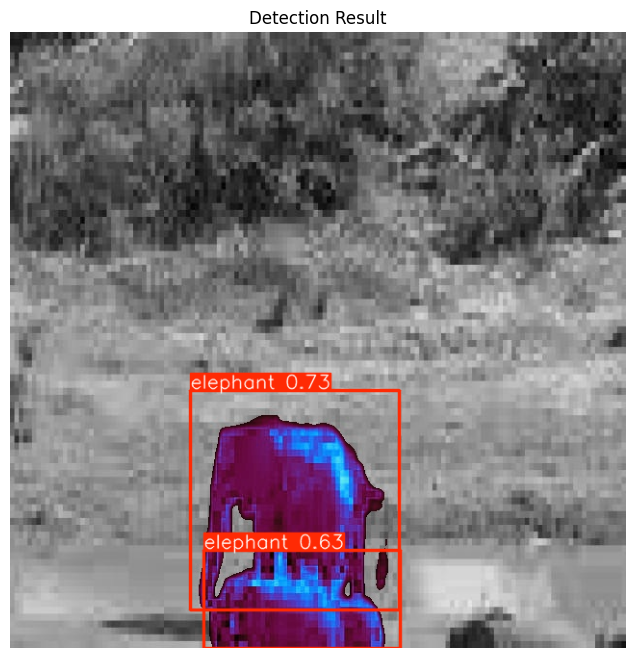

In [ ]:
# Convert YOLO result to OpenCV image
result_img = results[0].plot()

# Show image with bounding boxes
plt.figure(figsize=(10, 8))
plt.imshow(result_img)
plt.axis('off')
plt.title('Detection Result')
plt.show()


In [ ]:
# Extract detection results
boxes = results[0].boxes.xyxy.cpu().numpy()  # [x1, y1, x2, y2]
confidences = results[0].boxes.conf.cpu().numpy()

# Print each bounding box dimensions
for i, box in enumerate(boxes):
    x1, y1, x2, y2 = box
    width = x2 - x1
    height = y2 - y1
    print(f"Bounding Box {i+1}: Width = {width:.2f}px, Height = {height:.2f}px, Confidence = {confidences[i]:.2f}")


Bounding Box 1: Width = 217.57px, Height = 227.88px, Confidence = 0.73
Bounding Box 2: Width = 203.84px, Height = 101.43px, Confidence = 0.63


In [ ]:
uploaded = files.upload()

# Get the filename
img_path = list(uploaded.keys())[0]
print(f"Uploaded image: {img_path}")

Saving 1.jpg to 1.jpg
Uploaded image: 1.jpg


In [ ]:
results = model(img_path)


image 1/1 /content/1.jpg: 640x608 9 elephants, 76.5ms
Speed: 4.9ms preprocess, 76.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 608)


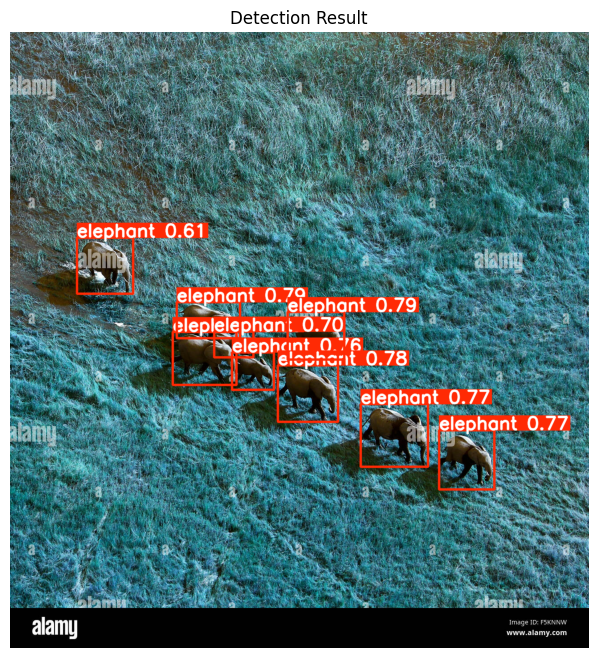

In [ ]:
# Convert YOLO result to OpenCV image
result_img = results[0].plot()

# Show image with bounding boxes
plt.figure(figsize=(10, 8))
plt.imshow(result_img)
plt.axis('off')
plt.title('Detection Result')
plt.show()
